# Correlaciones

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [81]:
df = pd.read_csv("../resources/weight-height.csv")

In [82]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: >

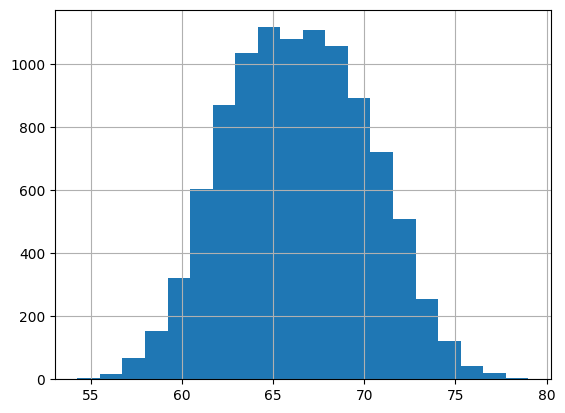

In [83]:
df['Height'].hist(bins=20)

In [84]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: >

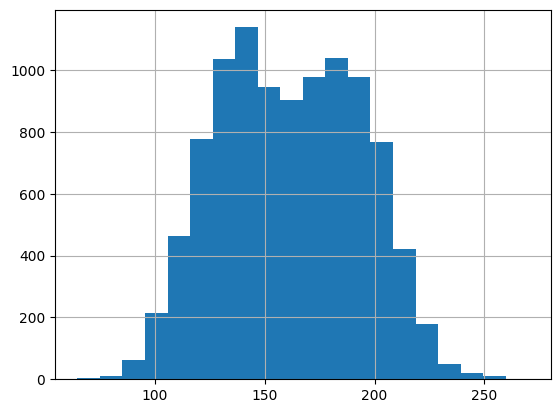

In [85]:
df['Weight'].hist(bins=20)

In [86]:
df['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

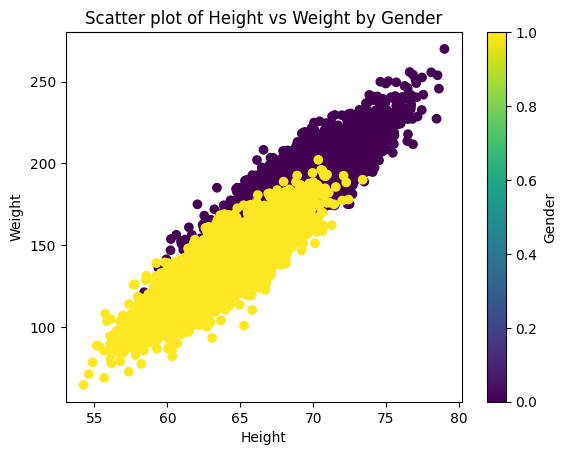

In [87]:
# Convertir 'Gender' a valores numéricos
df['GenderNumeric'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Graficar con un mapa de colores
plt.scatter(df['Height'], df['Weight'], c=df['GenderNumeric'], cmap='viridis')
plt.colorbar(label='Gender')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter plot of Height vs Weight by Gender')
plt.show()


## Coeficiente de Pearson (0.924756298740915):

El coeficiente de Pearson mide la relación lineal entre dos variables.
Un valor de aproximadamente 0.92 sugiere que hay una fuerte relación lineal positiva entre la altura y el peso. A medida que una aumenta, la otra también tiende a aumentar.


In [88]:
pearson, _ = pearsonr(df['Height'], df['Weight'])
print(pearson)

0.924756298740915


## Coeficiente de Spearman (0.9257076644210767):

El coeficiente de Spearman mide la relación monotónica (no necesariamente lineal) entre dos variables. Es menos sensible a valores atípicos y no asume una relación lineal.
Un valor de aproximadamente 0.93 indica que existe una fuerte relación monotónica entre la altura y el peso.

In [89]:
# Calcular el coeficiente de correlación de Spearman
spearman_corr, _ = spearmanr(df['Height'], df['Weight'])
print(spearman_corr)


0.9257076644210767


## Distribución de las variables



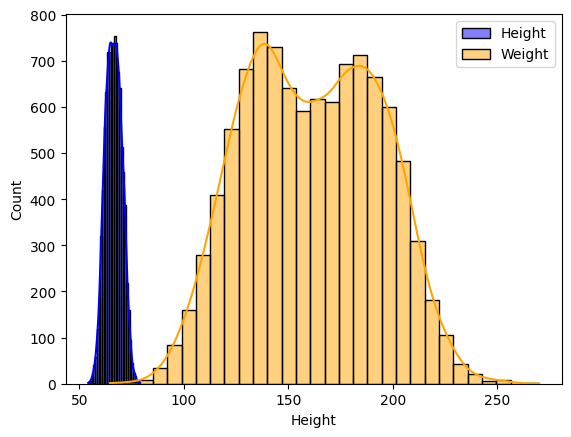

In [90]:
sns.histplot(df['Height'], kde=True, bins=30, color='blue', label='Height')
sns.histplot(df['Weight'], kde=True, bins=30, color='orange', label='Weight')
plt.legend()
plt.show()


#  Análisis univariado

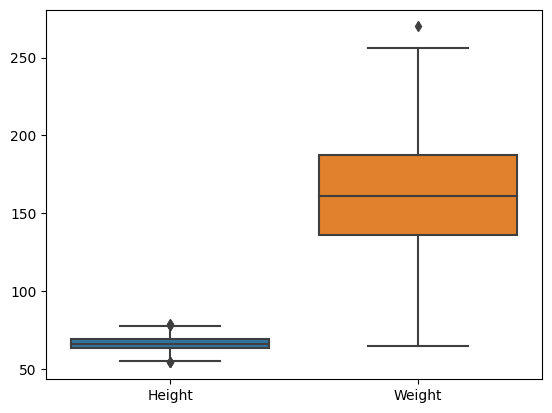

In [91]:
sns.boxplot(data=df[['Height', 'Weight']])
plt.show()


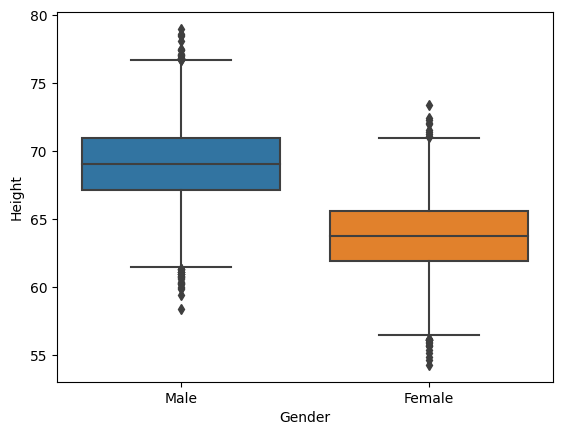

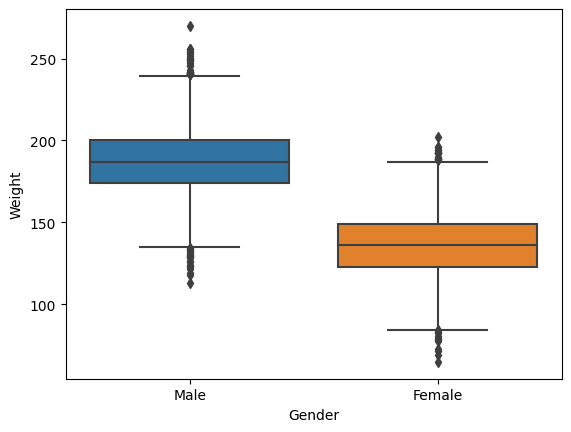

In [92]:
sns.boxplot(x='Gender', y='Height', data=df)
plt.show()
sns.boxplot(x='Gender', y='Weight', data=df)
plt.show()

## Análisis bivariado

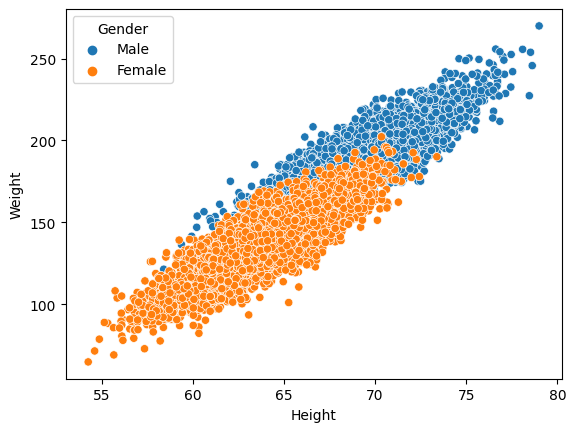

In [93]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender')
plt.show()

### Modelos de regresión simple

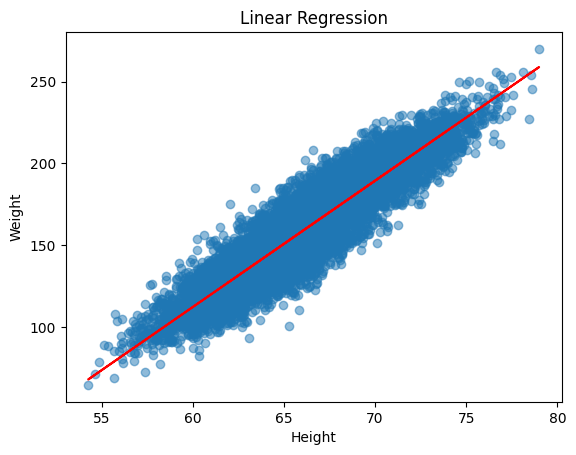

R² Score: 0.8551742120609958


In [94]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['Height'].values.reshape(-1, 1)
y = df['Weight']

model = LinearRegression()
model.fit(X, y)

# Predicción
y_pred = model.predict(X)

# Visualización
plt.scatter(df['Height'], df['Weight'], alpha=0.5)
plt.plot(df['Height'], y_pred, color='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Linear Regression')
plt.show()

print(f"R² Score: {model.score(X, y)}")


## Análisis multivariado

### Matriz de correlación

/tmp/ipykernel_101052/2291632263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


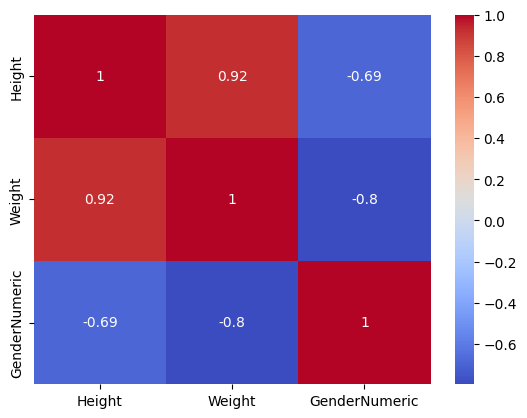

In [95]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Detección de valores atípicos



In [96]:
from scipy.stats import zscore

df['zscore_height'] = zscore(df['Height'])
df['zscore_weight'] = zscore(df['Weight'])

outliers = df[(df['zscore_height'].abs() > 3) | (df['zscore_weight'].abs() > 3)]
print(outliers)

      Gender     Height      Weight  GenderNumeric  zscore_height  \
994     Male  78.095867  255.690835              0       3.048423   
1317    Male  78.462053  227.342565              0       3.143602   
2014    Male  78.998742  269.989699              0       3.283099   
3285    Male  78.528210  253.889004              0       3.160798   
3757    Male  78.621374  245.733783              0       3.185013   
6624  Female  54.616858   71.393749              1      -3.054244   
9285  Female  54.263133   64.700127              1      -3.146184   

      zscore_weight  
994        2.935527  
1317       2.052591  
2014       3.380880  
3285       2.879407  
3757       2.625405  
6624      -2.804593  
9285      -3.013073  
